In [1]:
import os
os.path.realpath('..')

'/afs/cs.stanford.edu/u/wmonroe4/projects/pragmatics/coop-nets'

In [2]:
os.chdir(os.path.realpath('..'))

In [3]:
import numpy as np
import cPickle as pickle
from IPython.core.display import display, HTML

from stanza.research.instance import Instance as I

import color_instances as ci
from tokenizers import chinese_tokenizer as tokenize
from html_report import web_color

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
print('ms0')
with open('runs/chinese_s0_simp/quickpickle.p', 'rb') as infile:
    ms0 = pickle.load(infile)
print('ml0')
with open('runs/chinese_l0_tuned/quickpickle.p', 'rb') as infile:
    ml0 = pickle.load(infile)
print('bs0')
with open('runs/biling_s0_bit_halftuned/quickpickle.p', 'rb') as infile:
    bs0 = pickle.load(infile)
print('bl0')
with open('runs/biling_l0_halftuned/quickpickle.p', 'rb') as infile:
    bl0 = pickle.load(infile)

ms0
ml0
bs0
bl0


In [4]:
zh_dev = ci.chinese_filtered_dev()

In [5]:
zh_train = ci.chinese_filtered_train()

In [6]:
zh_dev[0].__dict__

{'alt_inputs': [(52.0, 65.77181208053692, 74.5),
  (76.0, 65.77181208053692, 74.5),
  (227.0, 78.04878048780488, 82.0)],
 'alt_outputs': None,
 'annotated_input': None,
 'annotated_output': None,
 'input': 0,
 'output': u'\u9ec4\u8272',
 'source': ('8805-5f3bc59e-a50f-4bb9-9d89-446cea4dba8a', '30', 'further')}

In [7]:
web_color((133.0, 94.17989417989418, 94.5))

'#0ef13f'

In [8]:
def show(insts):
    rows = []
    for inst in insts:
        triples = [
            (u'<b>{}</b>' if i == inst.input else u'{}').format(tuple(int(e) for e in inst.alt_inputs[i]))
            for i in range(len(inst.alt_inputs))
        ]
        colors = [
            u'<td bgcolor="{hex}"><font color="{font}">{triple}</font></td>'.format(
                hex=web_color(c),
                font=(u'white' if c[2] < 50.0 else u'black'),
                triple=t,
            )
            for c, t in zip(inst.alt_inputs, triples)
        ]
        utt = u'<td>{}</td>'.format(inst.output)
        rows.append(u'<tr>{}</tr>'.format(u''.join([utt] + colors)))
    html = u'<table>{}</table>'.format(''.join(rows))
    display(HTML(html))

import random
show(random.sample(zh_dev, 100))

较亮的青,"(98, 54, 68)","(15, 16, 54)","(117, 63, 73)"
绿色,"(272, 88, 89)","(86, 92, 93)","(142, 89, 90)"
红,"(333, 67, 75)","(159, 63, 73)","(226, 63, 73)"
蓝色,"(94, 16, 54)","(214, 90, 91)","(172, 86, 88)"
紫,"(280, 65, 74)","(308, 60, 71)","(195, 5, 51)"
棕色,"(237, 1, 50)","(238, 96, 96)","(15, 38, 62)"
红,"(353, 44, 64)","(325, 23, 56)","(314, 7, 52)"
灰色,"(104, 83, 85)","(237, 37, 61)","(179, 94, 95)"
紫,"(72, 87, 89)","(347, 89, 90)","(306, 64, 74)"
亮桃色,"(153, 78, 82)","(318, 92, 93)","(112, 23, 56)"
鲜绿,"(158, 80, 83)","(174, 56, 69)","(170, 88, 90)"


In [86]:
show([
    I(input=inst.input, alt_inputs=inst.alt_inputs, output=inst.source[-1])
    for inst in zh_dev[:100]
])

further,"(52, 65, 74)","(76, 65, 74)","(227, 78, 82)"
equal,"(204, 47, 65)","(287, 46, 65)","(76, 57, 70)"
equal,"(343, 99, 99)","(253, 84, 86)","(148, 11, 53)"
equal,"(120, 64, 74)","(238, 38, 62)","(57, 78, 82)"
closer,"(307, 33, 60)","(280, 56, 69)","(330, 69, 76)"
further,"(317, 14, 54)","(90, 0, 50)","(6, 92, 93)"
closer,"(178, 30, 59)","(112, 7, 52)","(220, 26, 57)"
further,"(145, 83, 86)","(167, 30, 59)","(82, 5, 51)"
equal,"(40, 92, 93)","(209, 95, 96)","(117, 80, 83)"
closer,"(132, 1, 50)","(37, 31, 59)","(181, 13, 53)"
further,"(201, 33, 60)","(358, 3, 51)","(148, 41, 63)"


In [9]:
from collections import Counter
c = Counter(t for inst in zh_dev for t in tokenize(inst.output))

Building prefix dict from the default dictionary ...
Dumping model to file cache /tmp/jieba.cache
Loading model cost 2.933 seconds.
Prefix dict has been built succesfully.


In [10]:
for k, v in c.most_common(100):
    print(u'{:5d} {}'.format(v, k))

  685  
  292 ~
  275 的
  168 紫色
  154 绿色
  139 灰色
  124 蓝色
   82 颜色
   73 蓝
   64 绿
   61 ：
   59 黄色
   56 不是
   55 灰
   52 他
   49 如下
   46 红
   41 最
   36 紫
   36 点击
   32 红色
   31 ，
   30 发现
   30 浅蓝
   29 最亮
   28 比较
   28 找到
   26 粉
   26 棕色
   25 亮
   24 色
   23 是
   22 接近
   22 这个
   22 浅
   22 橙色
   20 黄
   20 有点
   20 草地
   19 请
   19 浅绿色
   17 青
   17 那个
   16 也
   16 深
   15 更
   15 不
   15 粉红
   15 我
   14 天空
   14 但
   13 深绿色
   13 暗
   13 明亮
   13 混合
   13 浅紫色
   13 带
   12 叶子
   12 有
   12 中
   11 ？
   11 粉红色
   11 最深
   11 ...
   11 黯淡
   11 海
   10 哈哈
   10 一点点
   10 哈哈哈
   10 兰花
   10 最暗
   10 吗
    9 土
    9 较
    9 你
    9 萤光
    9 两个
    9 深蓝
    8 深灰色
    8 鲜艳
    8 牵牛花
    8 迷彩
    8 橙子
    8 蓝灰色
    8 中等
    8 绛红色
    8 暗淡
    8 对
    8 这种
    8 没有
    8 你好
    7 最浅
    7 大妈
    7 棕
    7 
    7 ！
    7 和
    7 ?
    7 葡萄
    6 一般


In [11]:
c_train = Counter(t for inst in zh_train for t in tokenize(inst.output))

for k, v in c_train.most_common(77):
    print(u'{:5d} {}'.format(v, k))

  650  
  298 的
  291 ~
  153 绿色
  129 紫色
  109 蓝色
  107 灰色
  106 颜色
   89 不是
   64 接近
   63 亮
   55 灰
   55 蓝
   51 绿
   47 最
   45 比较
   44 紫
   42 草
   39 黄色
   35 红
   34 ，
   33 粉色
   32 不
   29 棕色
   27 是
   26 红色
   25 。
   25 最亮
   25 那个
   24 明亮
   22 天空
   20 鲜艳
   20 也
   20 深
   20 暗
   20 天
   18 深绿色
   18 深色
   18 粉
   16 ？
   15 色
   15 浅
   15 一个
   15 土
   14 粉红
   14 基佬
   14 草地
   13 土色
   13 深蓝
   13 外线
   12 淡紫色
   12 有点
   11 橘色
   11 浅紫色
   10 最深
   10 不带
   10 亮绿
   10 暗淡
   10 浅绿色
    9 黄
    9 这是
    9 这
    9 我
    9 中
    9 橙色
    9 偏
    9 了
    8 偏黄
    8 啊
    8 草色
    8 较
    8 橙子
    8 青
    8 阴天
    8 对
    8 和
    8 黯淡


In [12]:
utts = [tokenize(inst.output) for inst in zh_dev]
basic_colors = [
    u'紫色',
    u'紫',
    u'绿色',
    u'绿',
    u'灰色',
    u'灰',
    u'蓝色',
    u'蓝',
    u'黄色',
    u'黄',
    u'红色',
    u'红',
]
premod = Counter(u[0] for u in utts if len(u) == 2 and u[1] in basic_colors)
postmod = Counter(u[1] for u in utts if len(u) == 2 and u[0] in basic_colors)

In [13]:
for k, v in premod.most_common(20):
    print(u'{:5d} {}'.format(v, k))

   10 中
    7 点击
    4 亮
    4 石灰
    4 灰
    2 粉
    2  
    2 学员
    1 亮亮的
    1 灰色
    1 红
    1 黑暗
    1 带
    1 皮肤
    1 纯
    1 荧光
    1 非蓝非
    1 带点
    1 绿色
    1 偏


In [14]:
for k, v in postmod.most_common(20):
    print(u'{:5d} {}'.format(v, k))

    3  
    3 紫色
    1 灰色
    1 蓝色
    1 紫
    1 偏蓝
    1 黄色
    1 ?


In [16]:
colors = [
    (0.0, 0.0, 0.0),
    (60.0, 100.0, 100.0),
    (120.0, 100.0, 100.0),
]
target = 2
utt = u'zh:绿色'
print repr(bs0.predict_and_score([I(alt_inputs=colors, input=target, output=utt)])).decode('unicode-escape')

Predicting
Predict batch 0 of 1 (~0% done, ETA unknown on Thu Oct 12 14:10:37 2017)
Scoring
([u'绿色'], [-1.2218227088451385])


In [17]:
insts = []
for hue in np.arange(60.0, 120.0):
    colors = [
        (0.0, 0.0, 0.0),
        (hue, 100.0, 100.0),
        (120.0, 100.0, 100.0),
    ]
    insts.append(I(alt_inputs=colors, input=1, output=u'zh:黄色'))
preds, scores = bs0.predict_and_score(insts)

Predicting
Scoring


In [18]:
for i, p in enumerate(preds):
    print 60 + i, p

60 黄色
61 黄色
62 黄色
63 黄色
64 黄色
65 黄色
66 黄色
67 黄色
68 黄色
69 黄色
70 黄色
71 黄色
72 黄色
73 黄色
74 黄色
75 黄色
76 黄色
77 黄色
78 黄色
79 黄色
80 黄色
81 黄色
82 黄色
83 黄色
84 黄色
85 亮 绿色
86 亮 绿色
87 亮 绿色
88 亮 绿色
89 亮 绿色
90 亮 绿色
91 亮 绿色
92 亮 绿色
93 亮 绿色
94 亮 绿色
95 亮 绿色
96 绿色   ~   是
97 绿色   ~   是
98 绿色   ~   是
99 绿色   ~   是
100 绿色   ~   是
101 绿色   ~   是
102 绿色   ~   是
103 绿色   ~   是
104 绿色   ~   是
105 绿色   ~   是
106 绿色   ~   是
107 绿色
108 绿色
109 绿色
110 绿色
111 绿色
112 绿色
113 绿色
114 绿色
115 绿色
116 绿色
117 绿色
118 绿色
119 绿色


In [19]:
scores

[-0.696934106759727,
 -0.7089239172637463,
 -0.7228315118700266,
 -0.7387384995818138,
 -0.7567652883008122,
 -0.7770796706900001,
 -0.7999030267819762,
 -0.8255198607221246,
 -0.8542888900265098,
 -0.8866624133661389,
 -0.923204249702394,
 -0.964623948559165,
 -1.011817554011941,
 -1.065914560109377,
 -1.128322727046907,
 -1.2007450619712472,
 -1.2851301711052656,
 -1.3834932390600443,
 -1.4975442681461573,
 -1.6281432388350368,
 -1.7747079012915492,
 -1.9348770659416914,
 -2.1046924581751227,
 -2.27932252548635,
 -2.454013492912054,
 -2.624846733175218,
 -2.789104384370148,
 -2.9452355187386274,
 -3.0926353838294744,
 -3.231340354308486,
 -3.3617709036916494,
 -3.484532417729497,
 -3.6002923380583525,
 -3.7096912413835526,
 -3.813307488337159,
 -3.9116392880678177,
 -4.00509587302804,
 -4.094008173793554,
 -4.178631434217095,
 -4.25916750356555,
 -4.335761617869139,
 -4.4085355289280415,
 -4.47757475450635,
 -4.5429569482803345,
 -4.604749681428075,
 -4.6630225498229265,
 -4.71784568

In [20]:
insts = []
for hue in np.arange(60.0, 120.0):
    colors = [
        (0.0, 0.0, 0.0),
        (hue, 100.0, 100.0),
        (120.0, 100.0, 100.0),
    ]
    insts.append(I(alt_inputs=colors, input=1, output=u'黄色'))
preds, scores = ms0.predict_and_score(insts)

Predicting
Scoring


In [23]:
for i, p in enumerate(preds):
    print 60 + i, p

60 绿色
61 绿色
62 绿色
63 绿色
64 绿色
65 绿色
66 绿色
67 绿色
68 绿色
69 绿色
70 绿色
71 绿色
72 绿色
73 绿色
74 绿色
75 绿色
76 绿色
77 绿色
78 绿色
79 绿色
80 绿色
81 绿色
82 绿色
83 绿色
84 绿色
85 绿色
86 绿色
87 绿色
88 绿色
89 绿色
90 绿色
91 绿色
92 绿色
93 绿色
94 绿色
95 绿色
96 绿色
97 绿色
98 绿色
99 绿色
100 绿色
101 绿色
102 绿色
103 绿色
104 绿色
105 绿色
106 绿色
107 绿色
108 绿色
109 绿色
110 绿色
111 绿色
112 绿色
113 绿色
114 绿色
115 绿色
116 绿色
117 绿色
118 绿色
119 绿色


In [21]:
scores

[-3.0531526133418083,
 -3.1037079952657223,
 -3.1567038893699646,
 -3.2116860449314117,
 -3.268118165433407,
 -3.32540462911129,
 -3.3829390108585358,
 -3.4401486441493034,
 -3.4965244233608246,
 -3.5516516491770744,
 -3.6052142530679703,
 -3.6569983661174774,
 -3.706882670521736,
 -3.7548196837306023,
 -3.8008236214518547,
 -3.8449502140283585,
 -3.8872827887535095,
 -3.927915595471859,
 -3.9669480100274086,
 -4.004475802183151,
 -4.040583163499832,
 -4.075347103178501,
 -4.10882892459631,
 -4.141078256070614,
 -4.172134652733803,
 -4.202026441693306,
 -4.230779752135277,
 -4.258411221206188,
 -4.284937277436256,
 -4.310373283922672,
 -4.334734633564949,
 -4.358040042221546,
 -4.380307160317898,
 -4.401559755206108,
 -4.421822272241116,
 -4.44112041592598,
 -4.459484741091728,
 -4.476944379508495,
 -4.493529699742794,
 -4.509270623326302,
 -4.52419650554657,
 -4.538332603871822,
 -4.5517013147473335,
 -4.564323857426643,
 -4.576217360794544,
 -4.587395533919334,
 -4.597872287034988,
 

In [24]:
len([i for i in zh_dev if u'黄色' in i.output])

67

In [25]:
len([i for i in zh_dev if u'黄' in i.output])

112

In [26]:
len(zh_dev)

1665

In [27]:
len([i for i in zh_dev if u'绿' in i.output])

254

In [28]:
len([i for i in zh_dev if u'紫' in i.output])

229

In [15]:
with open('behavioralAnalysis/wcs-hsv.pkl', 'rb') as infile:
    wcs_mapping = pickle.load(infile)

In [16]:
wcs_mapping['C06']

(25.3125, 41.96078431372549, 96.862745098039213)

In [17]:
def show_wcs(content_mapping):
    rows = []
    for row in 'ABCDEFGHIJ':
        cells = []
        for i in range(41):
            k = '{}{:02d}'.format(row, i)
            text = content_mapping(k)
            if isinstance(text, tuple):
                hexcode, text = text
            else:
                hexcode = web_color(wcs_mapping[k])
            cells.append(u'<td bgcolor="{hexcode}"><nobr>{text}</nobr></td>'.format(hexcode=hexcode,
                                                                                    text=text))
            if row in ('A', 'J'):
                break
        rows.append(u'<tr>{}</tr>'.format(''.join(cells)))
    html = u'<table>{}</table>'.format(''.join(rows))
    return HTML(html)

show_wcs(lambda k: (k[0] if k.endswith('00') else k[1:]))

In [18]:
def random_hsv_color():
    return np.random.uniform(0.0, 360.0), np.random.uniform(0.0, 100.0), np.random.uniform(0.0, 100.0)


input_insts = []
for key, color in wcs_mapping.iteritems():
    for _ in range(11):
        context = [random_hsv_color(), random_hsv_color()]
        target_idx = np.random.randint(3)
        context.insert(target_idx, color)
        input_insts.append(I(alt_inputs=context, input=target_idx, output=u'zh:', source=key))

In [19]:
from collections import defaultdict, Counter

def all_most_common(counter):
    k, count = counter.most_common(1)[0]
    return [k for k, c in counter.iteritems() if c == count]

def test_model(model, samples=None, insts=None, random=False):
    if insts is None:
        insts = input_insts
    if samples is None:
        samples = model.predict(insts, random=random)
    votes = defaultdict(list)
    for sample, inst in zip(samples, insts):
        if sample.strip():
            votes[inst.source].append(html_escape(sample))
    counters = {k: Counter(v) for k, v in votes.iteritems()}
    top = {k: u','.join(all_most_common(counter)) for k, counter in counters.iteritems()}
    return samples, show_wcs(lambda k: top[k] if k in top else u'')

In [20]:
from cgi import escape as html_escape
html_escape('<unk>')

'&lt;unk&gt;'

In [108]:
#preds_bs0, html = test_model(bs0)
_, html = test_model(bs0, samples=preds_bs0)
html

In [107]:
#samples_bs0, html = test_model(bs0, random=True)
_, html = test_model(bs0, samples=samples_bs0, random=True)
html

In [109]:
# samples_ms0, html = test_model(ms0)
_, html = test_model(ms0, samples=samples_ms0)
html

In [42]:
input_insts_en = []
for inst in input_insts:
    new_inst = I(**inst.__dict__)
    new_inst.output = u'en:'
    input_insts_en.append(new_inst)

In [90]:
samples_bs0_en, html = test_model(bs0, insts=input_insts_en)
html

Predicting
Predict batch 9 of 29 (~31% done, ETA Fri Oct 13 14:04:52 2017)
Predict batch 18 of 29 (~62% done, ETA Fri Oct 13 14:05:16 2017)
Predict batch 27 of 29 (~93% done, ETA Fri Oct 13 14:05:29 2017)


In [91]:
print('ms0_en')
with open('runs/hawkins_filtered_s0/quickpickle.p', 'rb') as infile:
    ms0_en = pickle.load(infile)

ms0_en


In [93]:
ms0_en.options.speaker_eval_batch_size = 128

In [94]:
samples_ms0_en, html = test_model(ms0_en, insts=input_insts_en)
html

Predicting
Predict batch 0 of 1, Predict batch 0 of 29 (~0% done, ETA unknown on Fri Oct 13 14:30:12 2017)
Predict batch 0 of 1, Predict batch 4 of 29 (~14% done, ETA Fri Oct 13 14:55:44 2017)
Predict batch 0 of 1, Predict batch 10 of 29 (~34% done, ETA Fri Oct 13 14:42:15 2017)
Predict batch 0 of 1, Predict batch 14 of 29 (~48% done, ETA Fri Oct 13 14:40:10 2017)
Predict batch 0 of 1, Predict batch 23 of 29 (~79% done, ETA Fri Oct 13 14:36:33 2017)
Predict batch 0 of 1, Predict batch 29 of 29 (~100% done, ETA Fri Oct 13 14:35:40 2017)


In [21]:
from scipy.misc import logsumexp

def build_basic_color_term_plot(model, basic_colors, scores=None, insts=None, names=True, tag=u''):
    if insts is None:
        insts = input_insts

    all_insts = []
    for inst in insts:
        for color in basic_colors:
            new_inst = I(**inst.__dict__)
            new_inst.output = tag + color
            all_insts.append(new_inst)

    if scores is None:
        scores = model.score(all_insts)
    scores_arr = logsumexp(np.array(scores).reshape((len(wcs_mapping), 11, len(basic_colors))), axis=1)
    patches = [inst.source for inst in insts[::11]]
    representative_hexcodes = {color: web_color(wcs_mapping[patches[i]])
                               for i, color in zip(scores_arr.argmax(axis=0), basic_colors)}
    best_color_terms = {patches[i]: basic_colors[c] for i, c in enumerate(scores_arr.argmax(axis=1))}
    
    return scores, show_wcs(lambda k: (representative_hexcodes[best_color_terms[k]],
                                       (best_color_terms[k] if names else u'')))

In [22]:
basic_colors=[u'灰色', u'红', u'黄色', u'棕色', u'绿色', u'蓝色', u'橙色', u'紫色']

In [146]:
ms0_scores, html = build_basic_color_term_plot(ms0, basic_colors)
html

Scoring
Score batch 0 of 454 (~0% done, ETA unknown on Wed Oct 18 22:53:36 2017)
Score batch 178 of 454 (~39% done, ETA Wed Oct 18 22:56:09 2017)
Score batch 356 of 454 (~78% done, ETA Wed Oct 18 22:56:09 2017)


In [147]:
_, html = build_basic_color_term_plot(ms0, basic_colors, scores=ms0_scores, names=False)
html

In [148]:
bs0_scores, html = build_basic_color_term_plot(bs0, basic_colors, tag=u'zh:')
html

Scoring
Score batch 24 of 227 (~11% done, ETA Wed Oct 18 23:00:23 2017)
Score batch 78 of 227 (~34% done, ETA Wed Oct 18 23:00:24 2017)
Score batch 132 of 227 (~58% done, ETA Wed Oct 18 23:00:23 2017)
Score batch 186 of 227 (~82% done, ETA Wed Oct 18 23:00:24 2017)


In [149]:
_, html = build_basic_color_term_plot(bs0, basic_colors, scores=bs0_scores, names=False)
html

In [158]:
basic_colors_en = [u'red', u'grey', u'pink', u'brown',
                   u'orange', u'yellow', u'green', u'teal',
                   u'blue', u'purple', u'black', u'white']

ms0_en_scores, html = build_basic_color_term_plot(ms0_en, basic_colors_en)
html

Scoring
Score batch 0 of 341 (~0% done, ETA unknown on Wed Oct 18 23:08:03 2017)
Score batch 126 of 341 (~37% done, ETA Wed Oct 18 23:10:46 2017)
Score batch 252 of 341 (~74% done, ETA Wed Oct 18 23:10:46 2017)


In [159]:
_, html = build_basic_color_term_plot(ms0_en, basic_colors_en, scores=ms0_en_scores, names=False)
html

In [160]:
bs0_en_scores, html = build_basic_color_term_plot(bs0, basic_colors_en, tag=u'en:')
html

Scoring
Score batch 14 of 341 (~4% done, ETA Wed Oct 18 23:17:13 2017)
Score batch 68 of 341 (~20% done, ETA Wed Oct 18 23:17:08 2017)
Score batch 123 of 341 (~36% done, ETA Wed Oct 18 23:17:07 2017)
Score batch 178 of 341 (~52% done, ETA Wed Oct 18 23:17:07 2017)
Score batch 232 of 341 (~68% done, ETA Wed Oct 18 23:17:07 2017)
Score batch 287 of 341 (~84% done, ETA Wed Oct 18 23:17:07 2017)


In [161]:
_, html = build_basic_color_term_plot(bs0, basic_colors_en, scores=bs0_en_scores, names=False)
html

In [162]:
import random
small_set = random.sample(input_insts, 100)

In [163]:
samples = bs0.predict(small_set, random=True)

Predicting
Predict batch 0 of 1 (~0% done, ETA unknown on Thu Oct 19 14:38:47 2017)


In [164]:
samples[:3]

[u'\u53f6\u5b50', u'\u84dd\u8272', u'\u8273 \u7d2b\u8272']

In [166]:
sample_insts = []
for inst, samp in zip(small_set, samples):
    new_inst = I(**inst.__dict__)
    new_inst.output = samp
    sample_insts.append(new_inst)
show(sample_insts)

叶子,"(71, 27, 91)","(325, 96, 15)","(187, 2, 23)"
蓝色,"(195, 100, 56)","(4, 93, 44)","(57, 90, 27)"
艳 紫色,"(319, 17, 35)","(323, 77, 50)","(124, 93, 9)"
土黄色,"(207, 77, 2)","(136, 72, 40)","(23, 14, 95)"
,"(117, 37, 22)","(259, 60, 27)","(226, 14, 88)"
土 金色,"(279, 80, 89)","(128, 16, 84)","(67, 58, 29)"
红,"(128, 11, 48)","(121, 20, 26)","(29, 83, 40)"
淡紫,"(215, 28, 65)","(319, 33, 6)","(227, 59, 68)"
,"(189, 100, 50)","(280, 17, 95)","(124, 78, 28)"
比较 绿 的 草 的 颜色,"(286, 69, 90)","(126, 61, 32)","(81, 0, 19)"
浅褐色,"(49, 64, 31)","(331, 51, 86)","(79, 23, 44)"


In [167]:
import random
small_set_en = random.sample(input_insts_en, 100)

In [168]:
samples_en = bs0.predict(small_set_en, random=True)

Predicting
Predict batch 0 of 1 (~0% done, ETA unknown on Thu Oct 19 14:47:54 2017)


In [169]:
sample_insts_en = []
for inst, samp in zip(small_set_en, samples_en):
    new_inst = I(**inst.__dict__)
    new_inst.output = samp
    sample_insts_en.append(new_inst)
show(sample_insts_en)

yellow ~ is orange ? ~ ok,"(241, 4, 22)","(266, 95, 9)","(7, 62, 92)"
green ~ kind of the green with more blue,"(149, 38, 85)","(8, 77, 33)","(264, 34, 81)"
the brown,"(270, 6, 11)","(220, 6, 57)","(352, 25, 97)"
on the three ~ muted as the bright +er ~ more them grass .,"(318, 76, 14)","(345, 64, 40)","(57, 100, 83)"
target is this +est or pink,"(61, 5, 55)","(267, 98, 75)","(319, 55, 73)"
redd +ish red,"(50, 50, 43)","(0, 82, 72)","(18, 95, 95)"
dark blue and not the least blue ~ you,"(189, 100, 50)","(65, 36, 86)","(212, 26, 36)"
blue,"(215, 28, 65)","(319, 33, 6)","(227, 59, 68)"
pea color natural green / gray green,"(104, 51, 21)","(6, 59, 12)","(17, 69, 30)"
"red , not dark","(340, 23, 95)","(346, 34, 21)","(55, 71, 76)"
dark blue,"(189, 100, 38)","(142, 96, 74)","(158, 88, 51)"


In [65]:
softmax_weights = bs0.model.predict_fn.get_shared()[-2].get_value().T

In [66]:
softmax_weights.shape

(1326, 50)

In [67]:
softmax_normalized = softmax_weights / np.sqrt((softmax_weights ** 2.).sum(axis=1, keepdims=True))

In [68]:
np.sort(np.sqrt((softmax_weights ** 2.).sum(axis=1)))

array([  3.32482815,   3.32511115,   3.37530088, ...,   9.22669888,
        10.22978973,  10.76506042], dtype=float32)

In [69]:
(softmax_normalized ** 2.).sum(axis=1, keepdims=True)

array([[ 0.99999982],
       [ 1.00000012],
       [ 1.00000024],
       ..., 
       [ 1.00000048],
       [ 1.        ],
       [ 1.        ]], dtype=float32)

In [70]:
vocab = list(bs0.seq_vec.tokens)

In [71]:
print vocab[101]

neon


In [72]:
bs0.seq_vec.vectorize([u'鲜艳'])[0]

97

In [73]:
print bs0.seq_vec.unvectorize([101])[0]

neon


In [74]:
import re

def language_of(w):
    if re.search(ur'[\u4e00-\u9fff]', w):
        if re.search(ur'[a-zA-Z]', w):
            return None
        else:
            return 'zh'
    elif re.search(ur'[a-zA-Z]', w):
        return 'en'
    else:
        return None

language_of(u'+er'), language_of(u'...红'), language_of(u'ugly 灰'), language_of(u'عربي')

('en', 'zh', None, None)

In [75]:
LANG_MASKS = {
    'en': np.array([-1000 if language_of(w) == 'zh' else 0
                    for w in vocab]),
    'zh': np.array([-1000 if language_of(w) == 'en' else 0
                    for w in vocab]),
}

def get_closest(w, weights=None, n=10, lang=None):
    if weights is None:
        weights = softmax_normalized
    w_idx = bs0.seq_vec.vectorize([w])[0]
    w_vec = weights[w_idx, :]
    dot_products = (weights * w_vec[np.newaxis, :]).sum(axis=1)
    if lang is not None:
        dot_products += LANG_MASKS[lang]
    order = np.argsort(-dot_products)
    for idx in order[:n]:
        print(u'{} {:.6f}'.format(bs0.seq_vec.unvectorize([idx])[0], dot_products[idx]))

In [76]:
get_closest(u'green', lang='zh')

青草 0.505102
' 0.502240
 0.496678
红绿灯 0.487905
] 0.472205
2 0.470235
军队 0.467867
青 0.466517
淡绿色 0.454090
15 0.450632


In [77]:
def normalize(weights):
    return weights / np.sqrt((weights ** 2.).sum(axis=1, keepdims=True))


def analogy(a1, a2, b1, weights=None, n=10, lang=None, transform=normalize):
    if transform is None:
        transform = lambda x: x
    if weights is None:
        weights = softmax_weights
    idx = bs0.seq_vec.vectorize([a1, a2, b1])
    a1_vec, a2_vec, b1_vec = weights[idx, :]
    target_vec = (b1_vec + a2_vec - a1_vec)[np.newaxis, :]
    dot_products = (transform(weights) * transform(target_vec)).sum(axis=1)
    for i in idx:
        dot_products[idx] -= 1000.
    if lang is not None:
        dot_products += LANG_MASKS[lang]
    order = np.argsort(-dot_products)
    #for b2_idx in order[:n]:
    #    print(u'{} {:.6f}'.format(bs0.seq_vec.unvectorize([b2_idx])[0], dot_products[b2_idx]))
    return bs0.seq_vec.unvectorize([order[0]])[0]

In [78]:
analogy(u'绿色', u'green', u'有', transform=None, weights=softmax_normalized, lang='en')

u'for'

In [79]:
tests_zh2en = [
    (u'的', [u'of', u"'s", u'that', u'one']),
    (u'紫色', [u'purple', u'violet', u'pink']),
    (u'灰色', [u'grey', u'grey', u'ash', u'dull']),
    (u'不是', [u'no', u'not', u"isn't", u'is', u'isn']),
    (u'绿', [u'green']),
    (u'接近', [u'like', u'close', u'similar', u'sort', u'kind']),
    (u'紫', [u'purple', u'violet', u'pink']),
    (u'比较', [u'more', u'less', u'compared', u'+er']),
    (u'黄色', [u'yellow']),
    (u'是', [u'is', u'yes', u'that']),
]

tests_en2zh = [
    (u'green', [u'绿', u'绿色', u'青', u'青色']),
    (u'blue', [u'蓝', u'蓝色']),
    (u'not', [u'不', u'不是', u'没', u'没有']),
    (u'grey', [u'灰', u'灰色']),
    (u'bright', [u'亮', u'明亮', u'鲜艳']),
    (u'color', [u'颜色', u'色']),
    (u'of', [u'的']),
    (u'red', [u'红色', u'红']),
    (u'brown', [u'棕', u'棕色', u'咖啡', u'咖啡色']),
    (u'more', [u'更', u'比较', u'比', u'多']),
]

def test_analogy(func, tests):
    correct = 0
    for q, a in tests:
        pred = func(q)
        if pred in a:
            correct += 1
    return correct

In [80]:
test_analogy(lambda w: analogy(u'red', u'红', w, transform=None, lang='zh'), tests_en2zh)

5

In [81]:
test_analogy(lambda w: analogy(u'蓝色', u'blue', w, transform=None, lang='en'), tests_zh2en)

6

In [82]:
test_analogy(lambda w: analogy(u'紫色', u'purple', w, lang='en'), tests_zh2en)

4

In [83]:
en_train = ci.filtered_train()
from tokenizers import heuristic_ending_tokenizer as en_tokenize
c_en_train = Counter(t for inst in en_train for t in en_tokenize(inst.output))

for k, v in c_en_train.most_common(30):
    print(u'{:5d} {}'.format(v, k))

Training contexts: 15684
 3874 green
 3621 the
 3502 ~
 2969 blue
 2707 purple
 1993 bright
 1923 +er
 1648 not
 1573 +ish
 1557 pink
 1537 grey
 1423 one
 1415 dark
 1362 ,
 1287 +est
  924 gray
  851 .
  840 yellow
  804 light
  775 color
  724 of
  721 brown
  708 is
  658 red
  627 ?
  572 orange
  543 more
  533 or
  531 dull
  521 a


In [84]:
for w_zh, _ in c_train.most_common(100):
    w_en = analogy(u'蓝色', u'blue', w_zh, transform=None, lang='en')
    print(u'{} -> {}'.format(w_zh, w_en))
print('')
for w_en, _ in c_en_train.most_common(100):
    w_zh = analogy(u'red', u'红', w_en, transform=None, lang='zh')
    print(u'{} -> {}'.format(w_en, w_zh))

  -> +er
的 -> +est
~ -> +er
绿色 -> green
紫色 -> purple
蓝色 -> purple
灰色 -> grey
颜色 -> lol
不是 -> the
接近 -> +er
亮 -> bright
灰 -> +er
蓝 -> teal
绿 -> green
最 -> bright
比较 -> +er
紫 -> purple
草 -> green
黄色 -> yellow
红 -> red
， -> +er
粉色 -> purple
不 -> purple
棕色 -> brown
是 -> +er
红色 -> pink
。 -> +er
最亮 -> neon
那个 -> of
明亮 -> +er
天空 -> purple
鲜艳 -> bright
也 -> is
深 -> purple
暗 -> purple
天 -> purple
深绿色 -> green
深色 -> purple
粉 -> purple
？ -> +er
色 -> +er
浅 -> green
一个 -> purple
土 -> +er
粉红 -> purple
基佬 -> purple
草地 -> green
土色 -> +er
深蓝 -> purple
外线 -> purple
淡紫色 -> purple
有点 -> +er
橘色 -> red
浅紫色 -> purple
最深 -> +er
不带 -> purple
亮绿 -> green
暗淡 -> purple
浅绿色 -> green
黄 -> yellow
这是 -> green
这 -> purple
我 -> +er
中 -> of
橙色 -> yellow
偏 -> purple
了 -> +er
偏黄 -> +er
啊 -> is
草色 -> green
较 -> teal
橙子 -> yellow
青 -> green
阴天 -> grey
对 -> green
和 -> +er
黯淡 -> a
艳 -> +er
水泥 -> purple
深灰色 -> green
里面 -> is
树 -> +er
粉红色 -> pink
但 -> +er
太阳 -> red
偏红 -> purple
这个 -> +er
哈哈哈 -> +er
灰蓝 -> green
天蓝色 -> teal
带点 ->

In [23]:
print('ms0')
with open('runs/zh_filtered/chinese_s0_notuned/quickpickle.p', 'rb') as infile:
    ms0 = pickle.load(infile)
print('ml0')
with open('runs/zh_filtered/chinese_l0_tuned/quickpickle.p', 'rb') as infile:
    ml0 = pickle.load(infile)
print('bs0')
with open('runs/zh_filtered/biling_s0_tuned/quickpickle.p', 'rb') as infile:
    bs0 = pickle.load(infile)
print('bl0')
with open('runs/zh_filtered/biling_l0_notuned_unbalanced/quickpickle.p', 'rb') as infile:
    bl0 = pickle.load(infile)

ms0


WARNING (theano.tensor.blas): We did not found a dynamic library into the library_dir of the library we use for blas. If you use ATLAS, make sure to compile it with dynamics library.


ml0
bs0
bl0


In [105]:
print('ms0_en')
with open('runs/hawkins_filtered_s0/quickpickle.p', 'rb') as infile:
    ms0_en = pickle.load(infile)

ms0_en


WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp21uXyx/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpsMT49K/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmplfEn9s/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp5JrUCs/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpPG6HXI/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpOx_IFZ/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpkEdNkh/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpemZfgG/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpXrnxnn/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmppIHHVQ/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmplarzxK/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpvhE7Xa/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpmWFRUc/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpV3eaWs/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp1_TMI9/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpKcoGSN/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpqpcBMX/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpFyolDT/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpJkGpJl/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp6MKI1l/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpujVbKQ/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp3sUrnb/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpFUAOZh/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmphy1PpI/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp7e9pYg/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmppDjORj/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpiiqDd5/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpzwgsQR/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpvLdGnp/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpCOupiv/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpLA4l0l/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmphqkYbx/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpxZIUhK/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp1UELDj/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmptPSCVb/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpi1JIML/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpRHaljB/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpeMAM7J/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp7fiIlK/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpL4IM1S/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpGK2gbF/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpuDmNS_/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpxJXQJd/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpwOyJIV/key.pkl because the corresponding module is gone from the file system.
WARNING (the

WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmp2aKgWP/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpsIXxV1/key.pkl because the corresponding module is gone from the file system.
WARNING (theano.gof.cmodule): Removing key file /afs/cs.stanford.edu/u/wmonroe4/.theano/compiledir_Linux-3.13--generic-x86_64-with-debian-jessie-sid-x86_64-2.7.12-64/tmpUZZbP9/key.pkl because the corresponding module is gone from the file system.


In [40]:
preds_bs0, html = test_model(bs0)
html

Predicting
Predict batch 0 of 29 (~0% done, ETA unknown on Fri Nov  3 17:34:12 2017)
Predict batch 1 of 29 (~3% done, ETA Fri Nov  3 19:09:37 2017)
Predict batch 3 of 29 (~10% done, ETA Fri Nov  3 18:37:47 2017)
Predict batch 10 of 29 (~34% done, ETA Fri Nov  3 17:56:52 2017)
Predict batch 11 of 29 (~38% done, ETA Fri Nov  3 18:03:02 2017)
Predict batch 12 of 29 (~41% done, ETA Fri Nov  3 18:08:29 2017)
Predict batch 13 of 29 (~45% done, ETA Fri Nov  3 18:08:46 2017)
Predict batch 15 of 29 (~52% done, ETA Fri Nov  3 18:11:00 2017)
Predict batch 19 of 29 (~66% done, ETA Fri Nov  3 18:08:35 2017)
Predict batch 23 of 29 (~79% done, ETA Fri Nov  3 18:07:11 2017)
Predict batch 24 of 29 (~83% done, ETA Fri Nov  3 18:08:43 2017)


In [41]:
samples_ms0, html = test_model(ms0)
#_, html = test_model(ms0, samples=samples_ms0)
html

Predicting
Predict batch 0 of 57 (~0% done, ETA unknown on Fri Nov  3 18:03:28 2017)
Predict batch 2 of 57 (~4% done, ETA Fri Nov  3 18:35:36 2017)
Predict batch 6 of 57 (~11% done, ETA Fri Nov  3 18:26:39 2017)
Predict batch 8 of 57 (~14% done, ETA Fri Nov  3 18:29:00 2017)
Predict batch 13 of 57 (~23% done, ETA Fri Nov  3 18:25:49 2017)
Predict batch 23 of 57 (~40% done, ETA Fri Nov  3 18:18:36 2017)
Predict batch 25 of 57 (~44% done, ETA Fri Nov  3 18:20:29 2017)
Predict batch 27 of 57 (~47% done, ETA Fri Nov  3 18:22:06 2017)
Predict batch 30 of 57 (~53% done, ETA Fri Nov  3 18:22:54 2017)
Predict batch 32 of 57 (~56% done, ETA Fri Nov  3 18:24:06 2017)
Predict batch 35 of 57 (~61% done, ETA Fri Nov  3 18:24:36 2017)
Predict batch 37 of 57 (~65% done, ETA Fri Nov  3 18:25:31 2017)
Predict batch 39 of 57 (~68% done, ETA Fri Nov  3 18:26:22 2017)
Predict batch 42 of 57 (~74% done, ETA Fri Nov  3 18:26:46 2017)
Predict batch 44 of 57 (~77% done, ETA Fri Nov  3 18:27:28 2017)
Predict b

In [90]:
samples_bs0_en, html = test_model(bs0, insts=input_insts_en)
html

Predicting
Predict batch 9 of 29 (~31% done, ETA Fri Oct 13 14:04:52 2017)
Predict batch 18 of 29 (~62% done, ETA Fri Oct 13 14:05:16 2017)
Predict batch 27 of 29 (~93% done, ETA Fri Oct 13 14:05:29 2017)


In [44]:
ms0_scores, html = build_basic_color_term_plot(ms0, basic_colors)
html

Scoring
Score batch 0 of 454 (~0% done, ETA unknown on Fri Nov  3 18:26:02 2017)
Score batch 124 of 454 (~27% done, ETA Fri Nov  3 18:29:42 2017)
Score batch 249 of 454 (~55% done, ETA Fri Nov  3 18:29:42 2017)
Score batch 374 of 454 (~82% done, ETA Fri Nov  3 18:29:42 2017)


In [45]:
_, html = build_basic_color_term_plot(ms0, basic_colors, scores=ms0_scores, names=False)
html

In [46]:
bs0_scores, html = build_basic_color_term_plot(bs0, basic_colors, tag=u'zh:')
html

Scoring
Score batch 0 of 227 (~0% done, ETA unknown on Fri Nov  3 18:29:42 2017)
Score batch 43 of 227 (~19% done, ETA Fri Nov  3 18:35:05 2017)
Score batch 89 of 227 (~39% done, ETA Fri Nov  3 18:34:51 2017)
Score batch 134 of 227 (~59% done, ETA Fri Nov  3 18:34:50 2017)
Score batch 178 of 227 (~78% done, ETA Fri Nov  3 18:34:52 2017)
Score batch 221 of 227 (~97% done, ETA Fri Nov  3 18:34:54 2017)


In [47]:
_, html = build_basic_color_term_plot(bs0, basic_colors, scores=bs0_scores, names=False)
html

In [49]:
bs0_en_scores, html = build_basic_color_term_plot(bs0, basic_colors_en, tag=u'en:')
html

Scoring
Score batch 0 of 341 (~0% done, ETA unknown on Fri Nov  3 18:37:06 2017)
Score batch 44 of 341 (~13% done, ETA Fri Nov  3 18:44:53 2017)
Score batch 88 of 341 (~26% done, ETA Fri Nov  3 18:44:52 2017)
Score batch 141 of 341 (~41% done, ETA Fri Nov  3 18:44:25 2017)
Score batch 186 of 341 (~55% done, ETA Fri Nov  3 18:44:30 2017)
Score batch 233 of 341 (~68% done, ETA Fri Nov  3 18:44:30 2017)
Score batch 278 of 341 (~82% done, ETA Fri Nov  3 18:44:32 2017)
Score batch 322 of 341 (~94% done, ETA Fri Nov  3 18:44:35 2017)


In [50]:
_, html = build_basic_color_term_plot(bs0, basic_colors_en, scores=bs0_en_scores, names=False)
html

In [29]:
train_colors = np.array([inst.alt_inputs for inst in zh_train]).reshape(-1, 3)
train_colors.shape

(4257, 3)

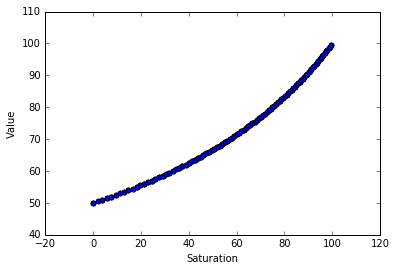

In [36]:
plt.scatter(train_colors[:, 1], train_colors[:, 2], alpha=0.1)
plt.xlabel('Saturation')
plt.ylabel('Value')
plt.show()

In [62]:
import colorsys
import random

def hsv_to_hsl(hi, si, vi):
    hf, sf, vf = hi / 360., si / 100., vi / 100.
    ho, lo, so = colorsys.rgb_to_hls(*colorsys.hsv_to_rgb(hf, sf, vf))
    if so == 0.0:
        ho = random.random()
    if lo == 0.0 or lo == 1.0:
        ho = random.random()
        so = random.random()
    return ho * 360., so * 100., lo * 100.

train_colors_hsl = np.array([hsv_to_hsl(*r) for r in train_colors])
train_colors_hsl.shape

(4257, 3)

In [93]:
def hsl_to_hsv(hi, si, li):
    hf, sf, lf = hi / 360., si / 100., li / 100.
    ho, so, vo = colorsys.rgb_to_hsv(*colorsys.hls_to_rgb(hf, lf, sf))
    if so == 0.0 or vo == 0.0:
        ho = random.random()
    if vo == 0.0:
        so = random.random()
    return ho * 360., so * 100., vo * 100.


def remove_lightness(h, s, v):
    h, s, _ = hsv_to_hsl(h, s, v)
    return hsl_to_hsv(h, s, 50.)


remove_lightness(145., 0., 90.)

(178.56123826728734, 0.0, 50.0)

In [95]:
wcs_light = wcs_mapping
wcs_mapping = {k: remove_lightness(*v) for k, v in wcs_mapping.iteritems()}

In [96]:
show_wcs(lambda k: (k[0] if k.endswith('00') else k[1:]))

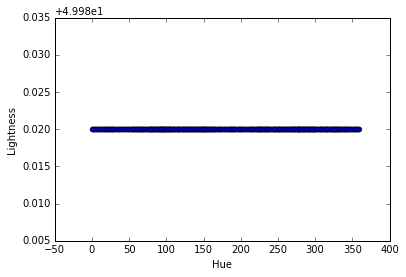

In [89]:
plt.scatter(train_colors_hsl[:, 0], train_colors_hsl[:, 2], alpha=0.1)
plt.xlabel('Hue')
plt.ylabel('Lightness')
plt.show()

In [63]:
wcs_colors_hsl = np.array([hsv_to_hsl(*k) for k in wcs_mapping.values()])
wcs_colors_hsl.shape

(330, 3)

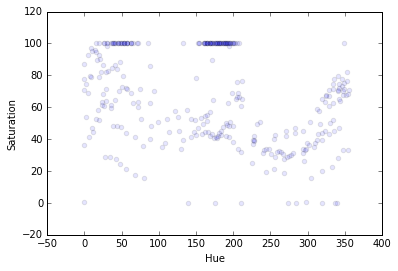

In [88]:
plt.scatter(wcs_colors_hsl[:, 0], wcs_colors_hsl[:, 1], alpha=0.1)
plt.xlabel('Hue')
plt.ylabel('Saturation')
plt.show()

In [97]:
input_insts = []
for key, color in wcs_mapping.iteritems():
    for _ in range(11):
        context = [random_hsv_color(), random_hsv_color()]
        target_idx = np.random.randint(3)
        context.insert(target_idx, color)
        input_insts.append(I(alt_inputs=context, input=target_idx, output=u'zh:', source=key))

input_insts_en = []
for inst in input_insts:
    new_inst = I(**inst.__dict__)
    new_inst.output = u'en:'
    input_insts_en.append(new_inst)

basic_colors_en = [u'red', u'grey', u'pink', u'brown',
                   u'orange', u'yellow', u'green', u'teal',
                   u'blue', u'purple', u'black', u'white']
basic_colors=[u'灰色', u'红', u'黄色', u'棕色', u'绿色', u'蓝色', u'橙色', u'紫色']

In [98]:
ms0_scores, html = build_basic_color_term_plot(ms0, basic_colors)
html

Scoring
Score batch 0 of 454 (~0% done, ETA unknown on Wed Nov 15 14:41:41 2017)
Score batch 198 of 454 (~44% done, ETA Wed Nov 15 14:44:00 2017)
Score batch 414 of 454 (~91% done, ETA Wed Nov 15 14:43:53 2017)


In [99]:
_, html = build_basic_color_term_plot(ms0, basic_colors, scores=ms0_scores, names=False)
html

In [100]:
bs0_scores, html = build_basic_color_term_plot(bs0, basic_colors, tag=u'zh:')
html

Scoring
Score batch 0 of 227 (~0% done, ETA unknown on Wed Nov 15 14:43:53 2017)
Score batch 60 of 227 (~26% done, ETA Wed Nov 15 14:47:42 2017)
Score batch 125 of 227 (~55% done, ETA Wed Nov 15 14:47:33 2017)
Score batch 187 of 227 (~82% done, ETA Wed Nov 15 14:47:33 2017)


In [101]:
_, html = build_basic_color_term_plot(bs0, basic_colors, scores=bs0_scores, names=False)
html

In [102]:
bs0_en_scores, html = build_basic_color_term_plot(bs0, basic_colors_en, tag=u'en:')
html

Scoring
Score batch 0 of 341 (~0% done, ETA unknown on Wed Nov 15 14:47:36 2017)
Score batch 63 of 341 (~18% done, ETA Wed Nov 15 14:53:06 2017)
Score batch 127 of 341 (~37% done, ETA Wed Nov 15 14:53:01 2017)
Score batch 190 of 341 (~56% done, ETA Wed Nov 15 14:53:01 2017)
Score batch 254 of 341 (~74% done, ETA Wed Nov 15 14:53:01 2017)
Score batch 318 of 341 (~93% done, ETA Wed Nov 15 14:53:00 2017)


In [103]:
_, html = build_basic_color_term_plot(bs0, basic_colors_en, scores=bs0_en_scores, names=False)
html

In [106]:
ms0_en_scores, html = build_basic_color_term_plot(ms0_en, basic_colors_en)
html

Scoring
Score batch 0 of 11 (~0% done, ETA unknown on Wed Nov 15 15:00:11 2017)
Score batch 5 of 11 (~45% done, ETA Wed Nov 15 15:02:53 2017)
Score batch 10 of 11 (~91% done, ETA Wed Nov 15 15:02:54 2017)


In [107]:
_, html = build_basic_color_term_plot(ms0_en, basic_colors_en, scores=ms0_en_scores, names=False)
html